In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer
from enum import Enum

In [2]:
from polygon_builder import PolygonBuilder

# Interfejs do tworzenia wielokątów

### Konstrukor PolygonBuilder(file_name, load)

file_name --- nazwa pliku, którego będziemy używać do zapisu/odczytu wielokątu. Jeśli nazwa nie zostanie podana, program wybierze nazwę polygon-1, jeśli w lokalnym folderze nie ma żadnych plików zaczynających się od prefiksu "polygon-", w przeciwnym wypadku zostanie wybrany największy z numerów wielokątów powiększony o 1.

load --- wartość True/False oznaczająca czy chcemy wczytać wielokąt z pliku podanego w file_name (True - wczytaj wielokąt, False - nie wczytuj).

### Najważniejsze funkcje

funkcja show --- wyświetla pole do zadawania wielokątów

funkcja load --- wczytuje wielokąt z pliku podanego w konstruktorze

funkcja save --- zapisuje wprowadzony wielokąt do pliku podanego w konstruktorze

funkcja get_polygon --- zwraca wielokąt w postaci list wierzchołków podanych w porządku przeciwnym do ruchu wskazówek zegara

funkcja clear_polygon --- czyści pole do wprowadzania wielokątów

funkcja clear_last_point --- usuwa ostatni dodany punkt

### Dodatkowo funkcje clear_polygon, clear_last_point oraz save można wywołać z klawiatury:

clear_polygon --- C

clear_last_point --- U

save --- S

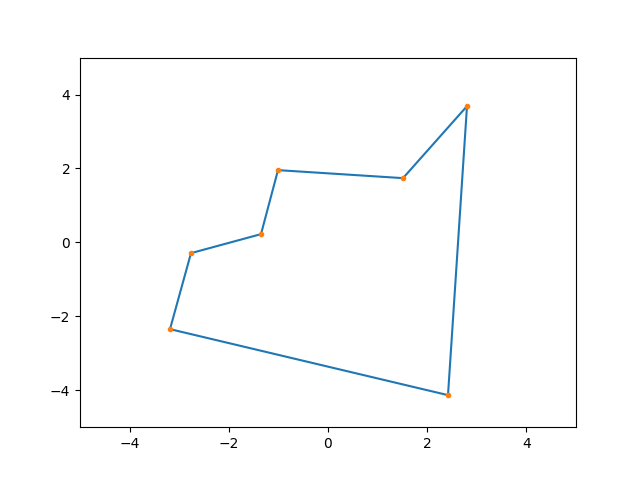

In [4]:
%matplotlib widget

polygon_builder = PolygonBuilder(file_name="polygon-4.txt", load=True)
polygon_builder.show()

Po zakończeniu wyboru wielokąta trzeba wywołać poniższą funkcję

In [6]:
plt.close('all')
%matplotlib inline

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [7]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [8]:
def draw_polygon(polygon):
    vis = Visualizer()
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [9]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [10]:
def draw_polygon_tri(polygon,tri):
    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

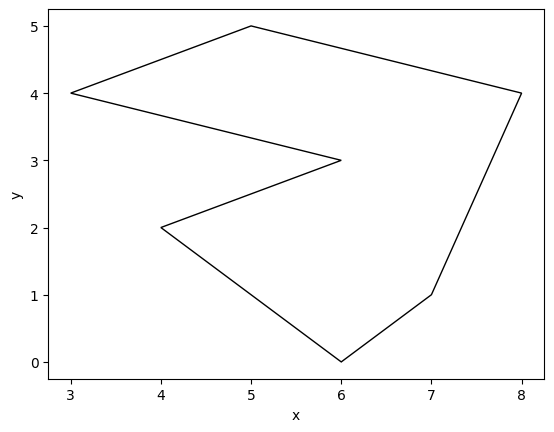

In [11]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [13]:
polygon = polygon_builder.get_polygon()

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [14]:
def is_y_monotonic(polygon, is_reversed=False):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    def cut_polygon(polygon):
        #funkcja pomocnicza szuka punktu o największej współrzędnej y i przesuwa całą tablicę tak aby znaleziony punkt był na początku
        res_ix = -1
        for ix in range(len(polygon)):
            if res_ix == -1 or polygon[res_ix][1] < polygon[ix][1]: res_ix = ix

        return polygon[res_ix:] + polygon[:res_ix]

    polygon = cut_polygon(polygon)

    ix = 1
    
    for _ in range(1, len(polygon)):
        p0, p1 = polygon[ix-1], polygon[ix]

        if p0[1] < p1[1]:
            break
        ix += 1

    

    if ix == len(polygon): return True
    if is_reversed: return False
    return is_y_monotonic([(a, -b) for a, b in polygon[ix:]], is_reversed=True)
    

Przeprowadź test poprawności powyższej funkcji.

In [15]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.003s


Sprawdź monotoniczność swojego wielokątu.

***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

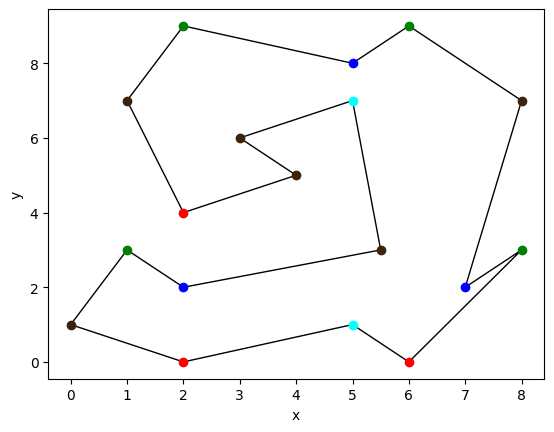

In [16]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [17]:
class Colors(Enum):
    START = 0
    END = 1
    CONN = 2
    DIV = 3
    REGULAR = 4

In [18]:
def color_vertex(polygon):
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawidłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """

    def orient(a, b, c):
        a_x, a_y = a
        b_x, b_y = b
        c_x, c_y = c
        
        return a_x * b_y + a_y  * c_x + b_x * c_y - c_x * b_y - c_y * a_x - b_x * a_y
    
    def colored(polygon, i):
        n = len(polygon)
        
        p0 = polygon[i-1]
        p1 = polygon[i]
        p2 = polygon[(i+1)%n]

        is_below = p0[1] > p1[1] and p2[1] > p1[1]
        is_above = p0[1] < p1[1] and p2[1] < p1[1]
        is_deg_less = orient(p0, p1, p2) > 0

        if is_above and is_deg_less: return Colors.START.value
        if is_above and not is_deg_less: return Colors.DIV.value
        if is_below and is_deg_less: return Colors.END.value
        if is_below and not is_deg_less: return Colors.CONN.value

        return Colors.REGULAR.value

    return [colored(polygon, i) for i in range(len(polygon))]

Przeprowadź test poprawności powyższej funkcji. 

In [19]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.003s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

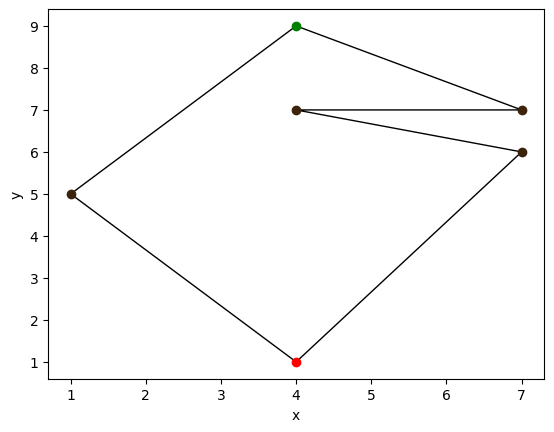

In [20]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

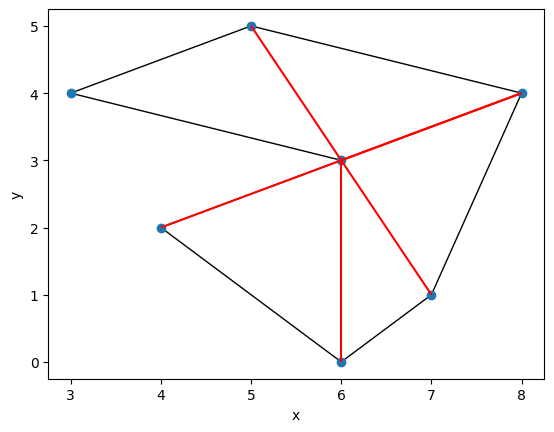

In [21]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [22]:
def cut_polygon(polygon):
    #funkcja pomocnicza szuka punktu o największej współrzędnej y i przesuwa całą tablicę tak aby znaleziony punkt był na początku
    res_ix = -1
    for ix in range(len(polygon)):
        if res_ix == -1 or polygon[res_ix][1] < polygon[ix][1]: res_ix = ix
        polygon[ix] = (*polygon[ix], ix)

    return polygon[res_ix:] + polygon[:res_ix]

def is_side(a, b, n):
    return a == (b+1)%n or (a+1)%n == b

def is_inside_p(orientation, is_left_side):
    if is_left_side and orientation > 0: return True
    if not is_left_side and orientation < 0: return True

    return False

def orient(a, b, c):
    a_x, a_y, *_ = a
    b_x, b_y, *_ = b
    c_x, c_y, *_ = c
        
    return a_x * b_y + a_y  * c_x + b_x * c_y - c_x * b_y - c_y * a_x - b_x * a_y

In [23]:
def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    
    polygon = cut_polygon(polygon)
    
    n = len(polygon)
    
    colors = color_vertex(list(map(lambda x: (x[0], x[1]), polygon)))
    end_vertex_ix = colors.index(Colors.END.value)

    polygon_div = [(polygon[i][0], polygon[i][1], i < end_vertex_ix, polygon[i][2]) for i in range(n)]

    polygon_left = list(filter(lambda x: x[2], polygon_div))
    polygon_right = list(filter(lambda x: not x[2], polygon_div))[::-1]

    def merge(polygon_left, polygon_right):
        i, j = 0, 0
        res = []
        while i < len(polygon_left) and j < len(polygon_right):
            if polygon_left[i][1] > polygon_right[j][1]:
                res.append(polygon_left[i])
                i += 1
            elif polygon_left[i][1] < polygon_right[j][1]:
                res.append(polygon_right[j])
                j += 1
            else:
                if polygon_left[i][0] < polygon_right[j][0]:
                    res.append(polygon_left[i])
                    i += 1
                else:
                    res.append(polygon_right[j])
                    j += 1

        while i < len(polygon_left):
            res.append(polygon_left[i])
            i += 1
        while j < len(polygon_right):
            res.append(polygon_right[j])
            j += 1

        return res
        
    polygon_div = merge(polygon_left, polygon_right)

    s = [polygon_div[0], polygon_div[1]]

    diag = []

    for current_v in polygon_div[2:]:
        last_v = s[-1]

        if last_v[2] != current_v[2]:
            diag.extend([[v[3], current_v[3]] for v in s if not is_side(v[3], current_v[3], n)])

            s = [last_v, current_v]
        else:
            while len(s) >= 2 and is_inside_p(orient(s[-2], s[-1], current_v), current_v[2]):
                if not is_side(s[-2][3], current_v[3], n): diag.append([s[-2][3], current_v[3]])
                s.pop()
            s.append(current_v)
    
    return diag

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [24]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.004s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

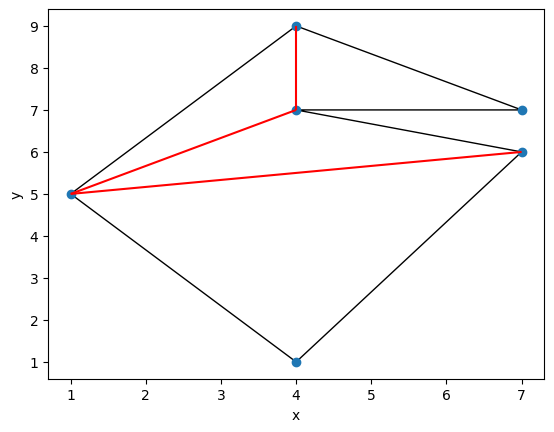

In [25]:
tri = triangulation(polygon[:])

draw_polygon_tri(polygon,[[polygon[i1], polygon[i2]] for i1, i2 in tri])

In [56]:
def triangulation_gif(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """

    vis = Visualizer()
    vis.add_point(polygon)
    vis.add_line_segment([(polygon[i], polygon[(i+1)%len(polygon)]) for i in range(len(polygon))])

    polygon = cut_polygon(polygon)
    
    n = len(polygon)
    
    colors = color_vertex(list(map(lambda x: (x[0], x[1]), polygon)))
    end_vertex_ix = colors.index(Colors.END.value)

    polygon_div = [(polygon[i][0], polygon[i][1], i < end_vertex_ix, polygon[i][2]) for i in range(n)]

    polygon_left = list(filter(lambda x: x[2], polygon_div))
    polygon_right = list(filter(lambda x: not x[2], polygon_div))[::-1]


    def merge(polygon_left, polygon_right):
        i, j = 0, 0
        res = []
        while i < len(polygon_left) and j < len(polygon_right):
            if polygon_left[i][1] > polygon_right[j][1]:
                res.append(polygon_left[i])
                i += 1
            elif polygon_left[i][1] < polygon_right[j][1]:
                res.append(polygon_right[j])
                j += 1
            else:
                if polygon_left[i][0] < polygon_right[j][0]:
                    res.append(polygon_left[i])
                    i += 1
                else:
                    res.append(polygon_right[j])
                    j += 1

        while i < len(polygon_left):
            res.append(polygon_left[i])
            i += 1
        while j < len(polygon_right):
            res.append(polygon_right[j])
            j += 1

        return res
        
    polygon_div = merge(polygon_left, polygon_right)

    s = [polygon_div[0], polygon_div[1]]
    vis.add_point(polygon_div[0][:2], color='red')
    vis.add_point(polygon_div[1][:2], color='red')

    diag = []

    for current_v in polygon_div[2:]:
        last_v = s[-1]
        vis.add_point(current_v[:2], color="green")

        if last_v[2] != current_v[2]:
            for v in s:
                l1 = vis.add_line_segment([v[:2], current_v[:2]], color="green")

                if not is_side(v[3], current_v[3], n):
                    diag.append([v[3], current_v[3]])
                    vis.add_line_segment([v[:2], current_v[:2]], color="red")
                vis.remove_figure(l1)
                vis.add_point(v[:2], color='grey')

            s = [last_v, current_v]
            vis.add_point(last_v[:2], color="red")
            vis.add_point(current_v[:2], color="red")
        else:
            vis_line = vis.add_line_segment([[s[-2][:2], s[-1][:2]], [s[-1][:2], current_v[:2]], [current_v[:2], s[-2][:2]]], color="green") if len(s) >= 2 else None
            while len(s) >= 2 and is_inside_p(orient(s[-2], s[-1], current_v), current_v[2]):
                if not is_side(s[-2][3], current_v[3], n): 
                    diag.append([s[-2][3], current_v[3]])
                    vis.add_line_segment([s[-2][:2], current_v[:2]], color="red")
                vis.add_point(s[-1][:2], color="grey")
                s.pop()
                if vis_line is not None: vis.remove_figure(vis_line)
                vis_line = vis.add_line_segment([[s[-2][:2], s[-1][:2]], [s[-1][:2], current_v[:2]], [current_v[:2], s[-2][:2]]], color="green") if len(s) >= 2 else None
                
            if vis_line is not None: vis.remove_figure(vis_line)
            s.append(current_v)
            vis.add_point(current_v[:2], color="red")
    
    return diag, vis

In [57]:
tri, tri_vis = triangulation_gif(polygon[:])

In [58]:
tri_vis.save_gif('triangulation', interval=800)